In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#shape of the datset;i.e, features,etc
print (df.shape)

(150, 5)


In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

# Scatter plot

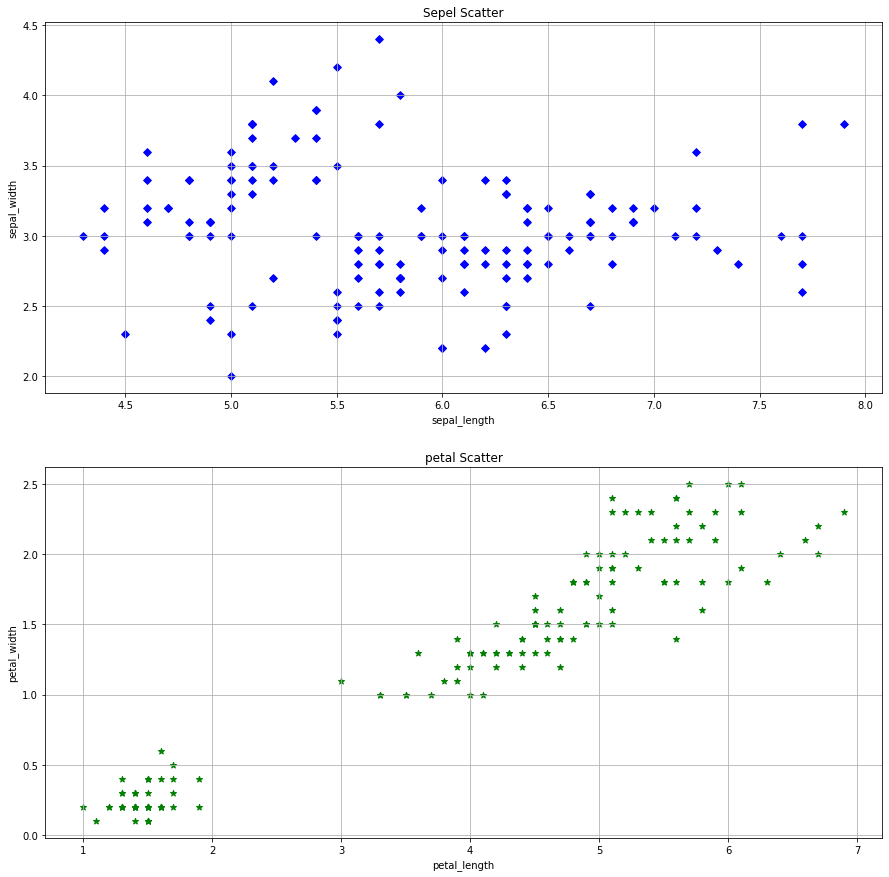

In [11]:
fig = plt.figure(figsize=(15,15))
plt.subplot(211)
#plt.subplots_adjust(bottom = 0.5)
plt.scatter(x = 'sepal_length', y = 'sepal_width', data = df, color = 'blue', s = 30, marker = 'D')
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("Sepel Scatter")
plt.grid()

plt.subplot(212)
plt.scatter(x = 'petal_length', y = 'petal_width', data = df, color = 'green', s = 40, marker = '*')
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.title("petal Scatter")
plt.grid()

fig.savefig('out.png', dpi=100)

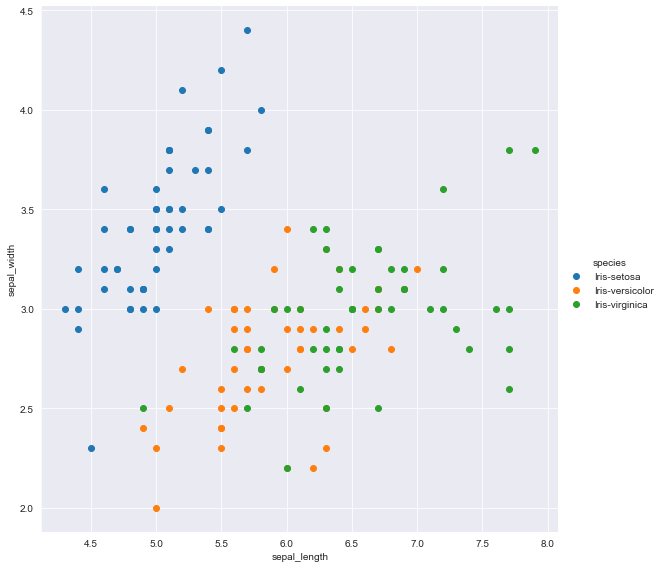

In [12]:
sns.set_style("darkgrid");
sns.FacetGrid(df, hue = 'species', size = 8) \
   .map(plt.scatter, 'sepal_length', 'sepal_width') \
   .add_legend();

# Pair plot

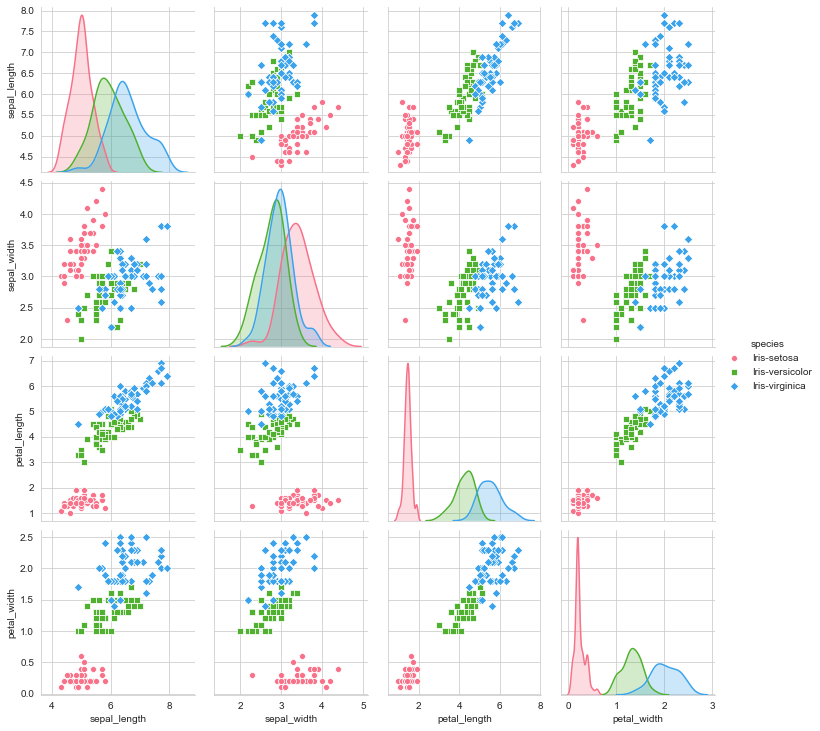

In [13]:
plt.close()
sns.set_style('whitegrid');
sns.pairplot(df, hue="species", markers=["o", "s", "D"], palette="husl")

# Histogram, PDF, CDF

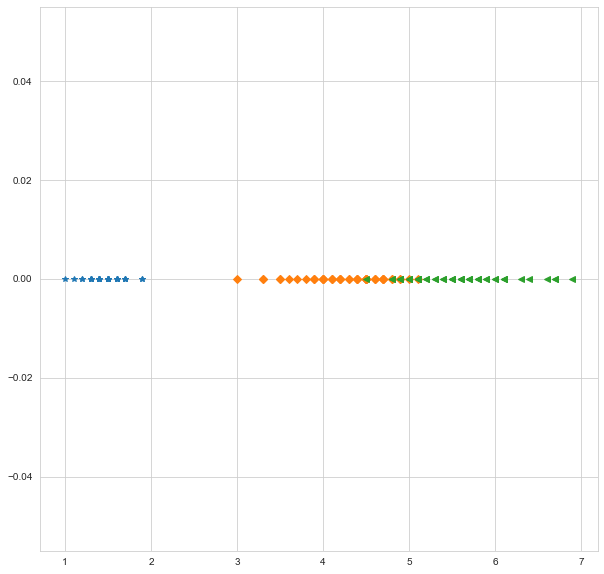

In [15]:
plt.close()
fig = plt.figure(figsize=(10, 10))
iris_setosa = df.loc[df["species"] == "Iris-setosa"];
iris_virginica = df.loc[df["species"] == "Iris-virginica"];
iris_versicolor = df.loc[df["species"] == "Iris-versicolor"];

#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), '*')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'D')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), '<')

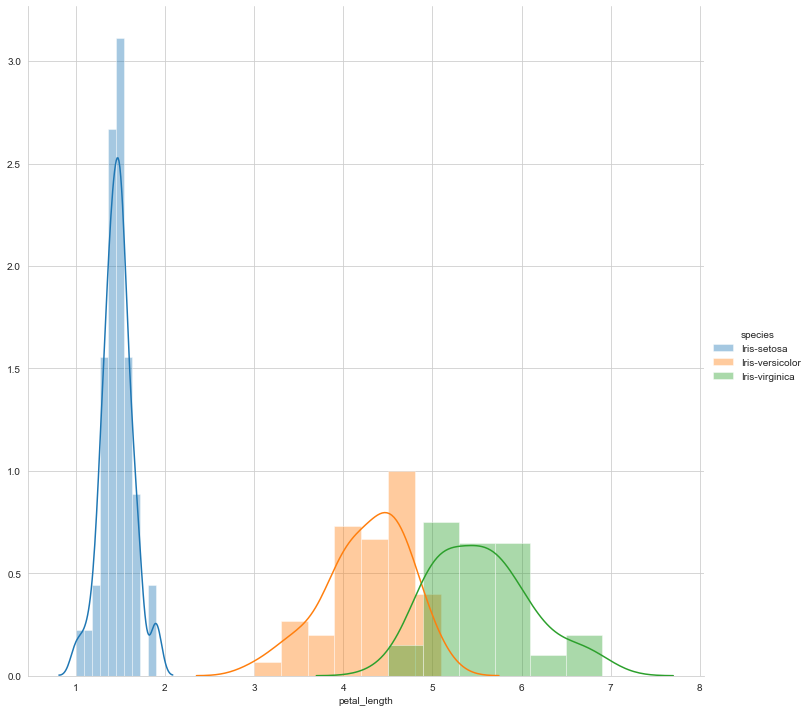

In [16]:
sns.FacetGrid(df, hue="species", size=10) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();

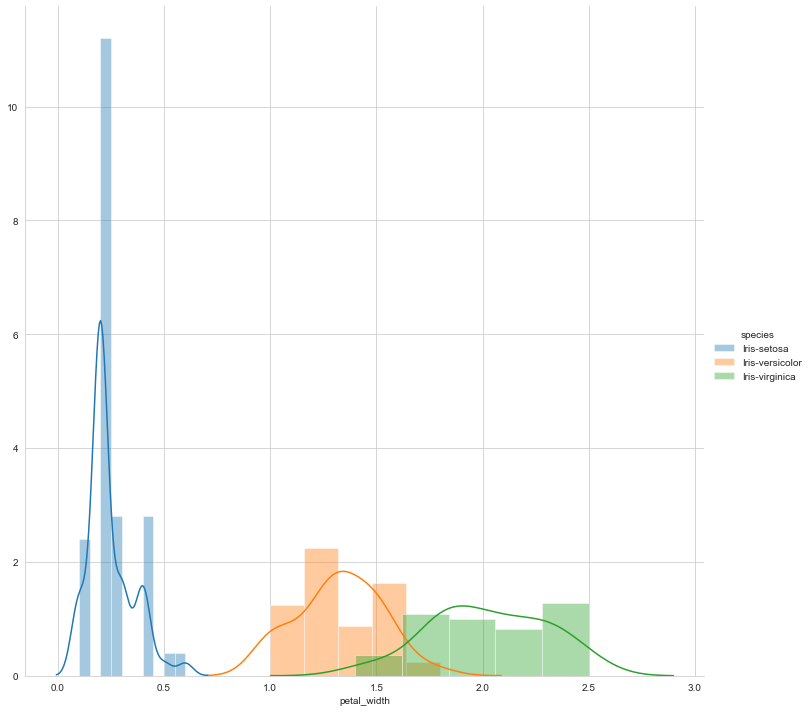

In [17]:
sns.FacetGrid(df, hue="species", size=10) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

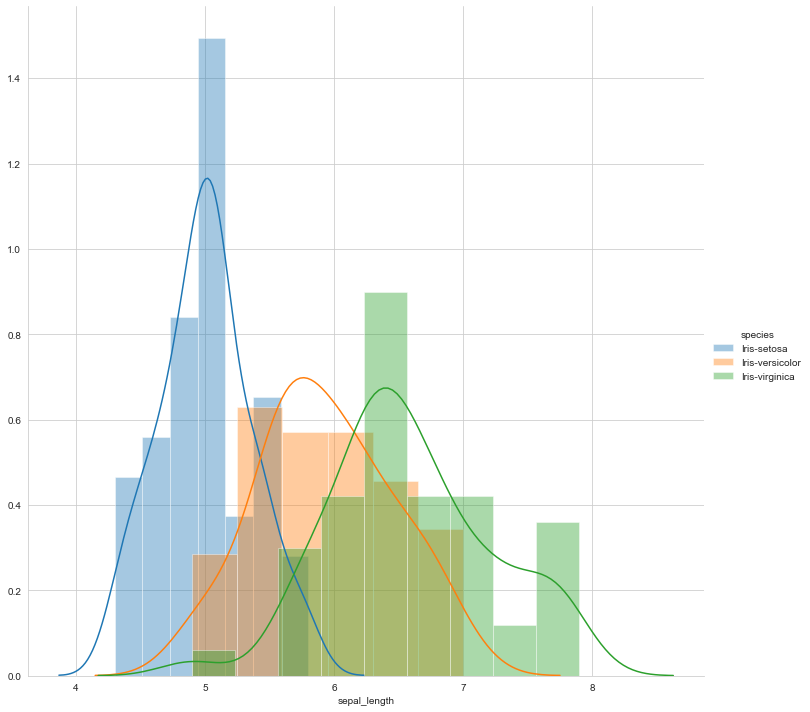

In [18]:
sns.FacetGrid(df, hue="species", size=10) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

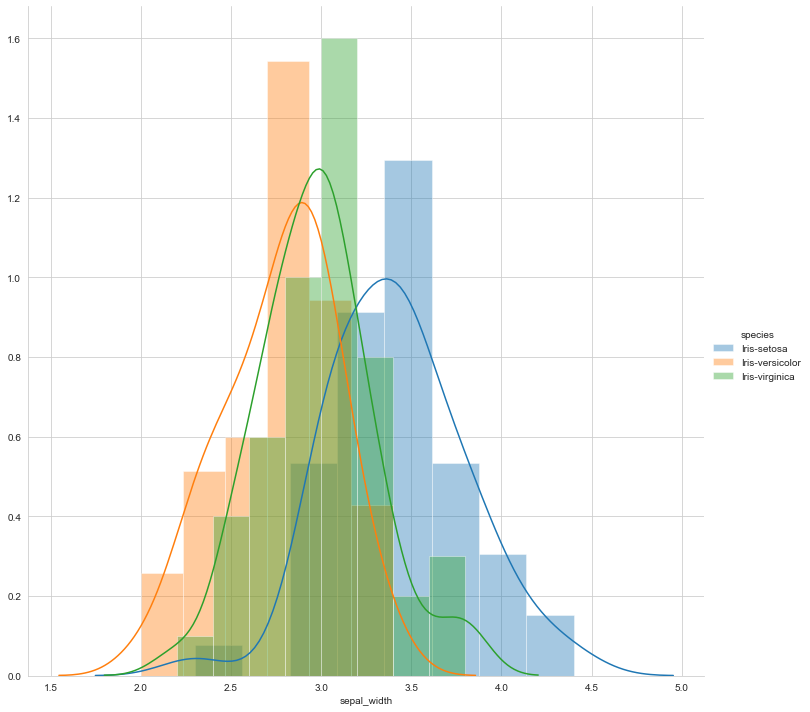

In [19]:
sns.FacetGrid(df, hue="species", size=10) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


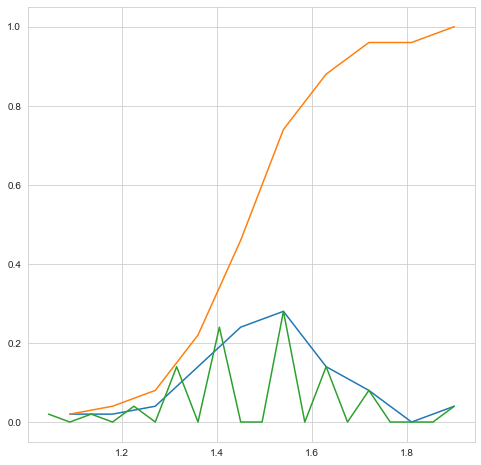

In [20]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                density = True)
fig = plt.figure(figsize=(8, 8))
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


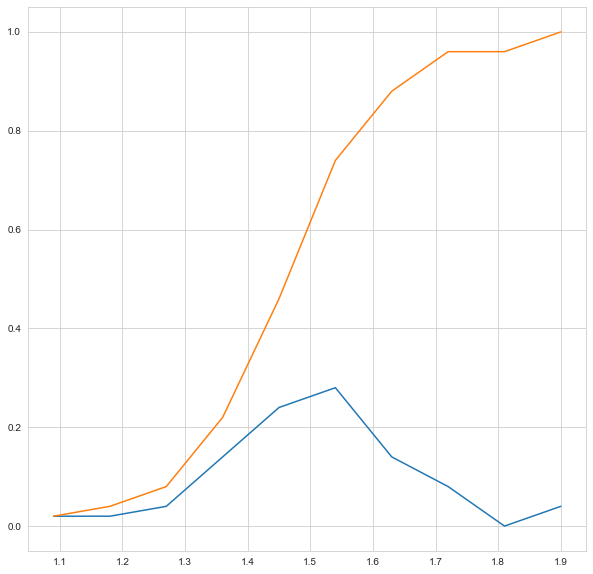

In [21]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                density = True)
fig = plt.figure(figsize=(10, 10))
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


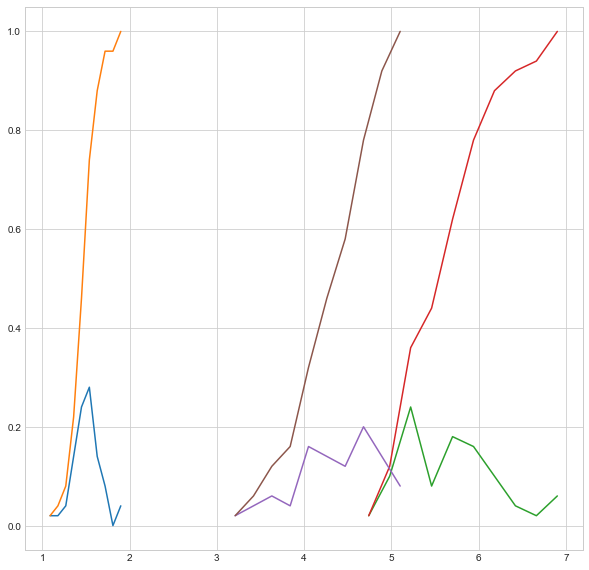

In [22]:
plt.style.use('seaborn-whitegrid')
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
fig = plt.figure(figsize=(10, 10))
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# Mean, Variance and Std-dev

In [23]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.464
2.4156862745098038
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


In [24]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))

print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# Box plot and Whiskers

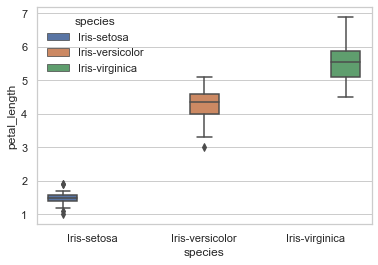

In [25]:
plt.close()
#fig = plt.figure(figsize=(8, 8))
plt.style.use('ggplot')
sns.set(style="whitegrid")
sns.boxplot(x='species',y='petal_length', hue = 'species', data=df)

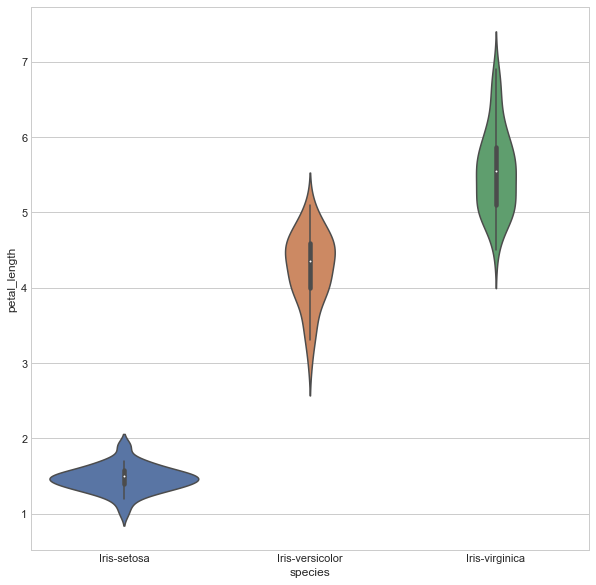

In [26]:
# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot
plt.close()
fig = plt.figure(figsize=(10, 10))
plt.style.use('seaborn-whitegrid')
sns.violinplot(x="species", y="petal_length", data=df, size=8)
#plt.show()

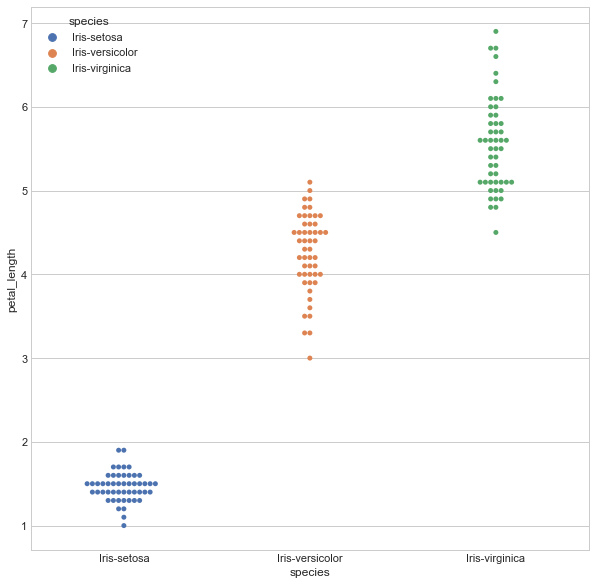

In [27]:
plt.close()
fig = plt.figure(figsize=(10, 10))
sns.swarmplot(x="species", y="petal_length", hue = 'species', data=df)

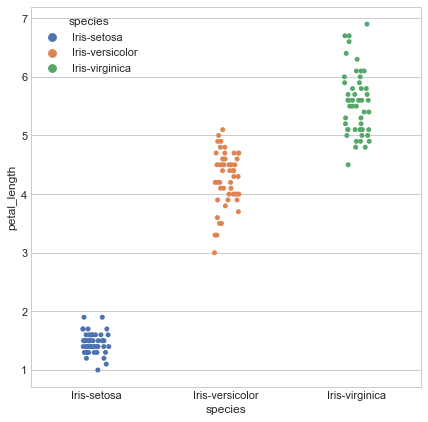

In [28]:
plt.close()
fig = plt.figure(figsize=(7, 7))
sns.stripplot(x="species", y="petal_length", hue = 'species', data=df)

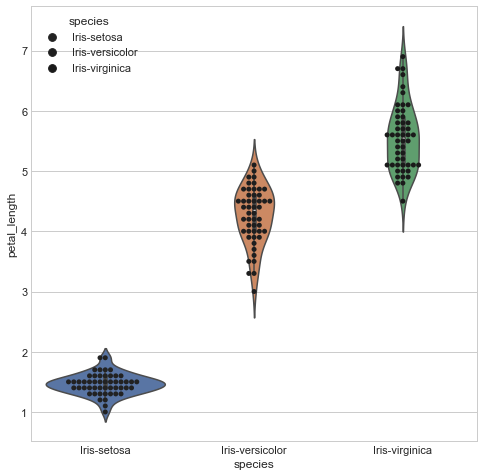

In [29]:
plt.close()
fig = plt.figure(figsize=(8, 8))
sns.violinplot(x="species", y="petal_length", data=df)
sns.swarmplot(x="species", y="petal_length",  hue = 'species', data=df, color=".1")

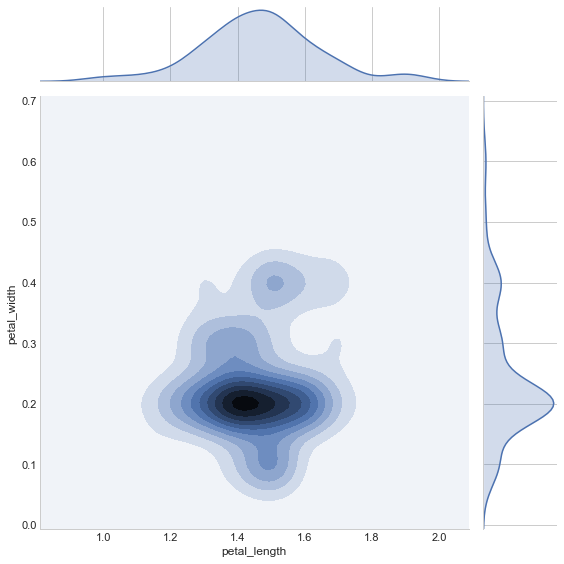

In [30]:
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde", size = 8);
plt.show();

In [31]:
iris_virginica_SW = iris_virginica.iloc[:,1]
iris_versicolor_SW = iris_versicolor.iloc[:,1]

In [32]:
from scipy import stats
stats.ks_2samp(iris_virginica_SW, iris_versicolor_SW)

KstestResult(statistic=0.26, pvalue=0.06779471096995852)

In [33]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')

KstestResult(statistic=0.43641896374950706, pvalue=0.0299809860447946)

In [34]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')

KstestResult(statistic=0.17598393125788936, pvalue=0.0035224660178468925)

In [35]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')

KstestResult(statistic=0.08276509139684346, pvalue=2.086256593583157e-06)